<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleF_Section_20_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 20: Numerical Differentiation**

# *20.1 Numerical Differentiation Problem Statement*

The problem statement for numerical differentiation is: given the values of some function f over a discretized region (a numerical grid), find an approximation for the derivative of f over this region. We will also be concerned with the accuracy of these approximations, for which we will discuss several methods in the following sections.

# *20.2 Finite Difference Approximating Derivatives*

We often define the derivative f'(x) at some value a of a function f(x) as the following:

In [ ]:
# f'(a) = lim_{x->a} [(f(x)-f(a))/(x-a)]

On a discretized, numerical grid, we can approximate this limit as x approaches a as two neighboring points on the grid. This allows us to write several finite difference definitions for the derivative:

In [ ]:
# forward difference
# f'(x_j) = (f(x_{j+1})-f(x_{j})) / (x_{j+1}-x_{j})

# backward difference
# f'(x_j) = (f(x_{j})-f(x_{j-1})) / (x_{j}-x_{j-1})

# central difference
# f'(x_j) = (f(x_{j+1})-f(x_{j-1})) / (x_{j+1}-x_{j-1})

With the spacing in the discretized region being a constant value h, we can use the Taylor Series representations of functions discussed in the previous module to expand the f(x_j) in the finite difference definitions to derive the follosing experssions which approximate the derivative:

In [ ]:
# forward difference
# f'(x_j) = (f(x_{j+1})-f(x_{j})) / h + O(h)

# backward difference
# f'(x_j) = (f(x_{j})-f(x_{j-1})) / h + O(h)

# central difference
# f'(x_j) = (f(x_{j+1})-f(x_{j-1})) / 2h + O(h^2)

In these expressions, the O(h^p) represents higher order terms, and as such, expression with larger p values (like the central difference) have higher accuracy, since the approximation is accurate up to a higher order. As we can see from this, approximations that are symmetric about the point x_j are generally more accurate than approximations which are not symmetric about x_j. Let's take a look at these approximations in action, with a simple example: f(x) = sin(x).

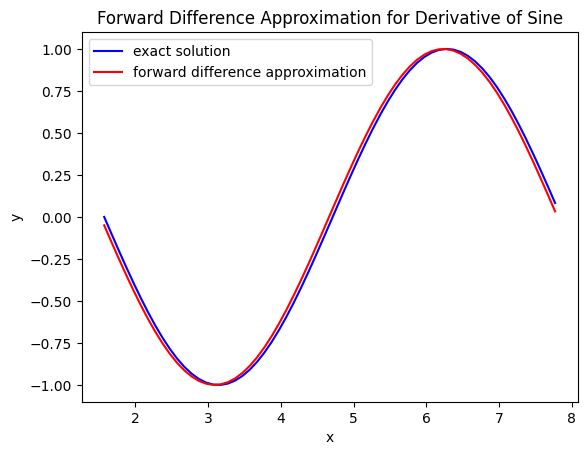

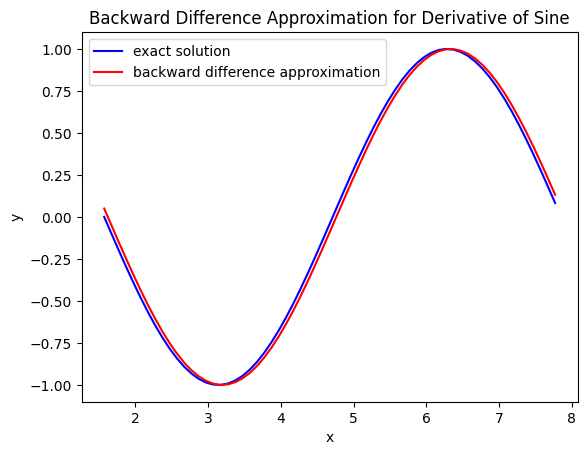

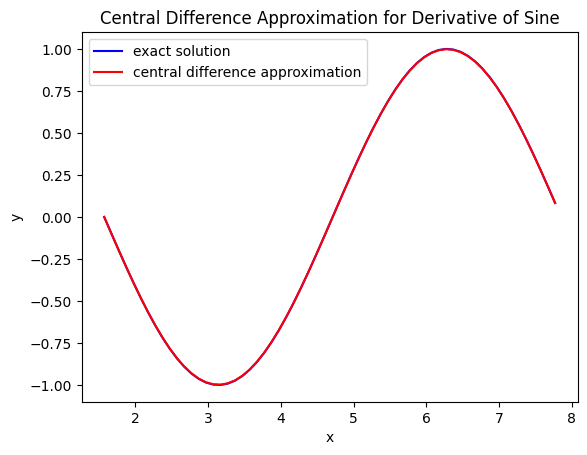

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

def forward_difference(f, x, h):
    return ((f(x+h) - f(x)) / h)

def backward_difference(f, x, h):
    return ((f(x) - f(x-h)) / h)
    
def central_difference(f, x, h):
    return ((f(x+h) - f(x-h)) / (2.0*h))

h = 0.1
x = np.arange(np.pi/2,5*np.pi/2,h) 

plt.figure(1)
plt.plot(x,f_prime(x),'b-',label = 'exact solution');
plt.plot(x,forward_difference(f,x,h),'r-',label = 'forward difference approximation');
plt.title('Forward Difference Approximation for Derivative of Sine');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

plt.figure(2)
plt.plot(x,f_prime(x),'b-',label = 'exact solution');
plt.plot(x,backward_difference(f,x,h),'r-',label = 'backward difference approximation');
plt.title('Backward Difference Approximation for Derivative of Sine');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

plt.figure(3)
plt.plot(x,f_prime(x),'b-',label = 'exact solution');
plt.plot(x,central_difference(f,x,h),'r-',label = 'central difference approximation');
plt.title('Central Difference Approximation for Derivative of Sine');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In these three figures, it is pretty clear that the forward difference overshoots the exact solution, while the backwards difference lags behind it. In comparison, the central difference is visually far more accurate.

Using finite differences, we can express even more accurate approximations for the derivative, especially if we use more points around x_j. For example, if we sample from two points to the left and right of x_j, we can derive the approximation

In [ ]:
# f'(x_j) = (f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j+1}) - f(x_{j+2})) / 12h + O(h^4)

This approximation is much more accurate than the central difference, but it comes at the cost of requires two times as many calculations. Let's see this approximation used for our previous example, sin(x).

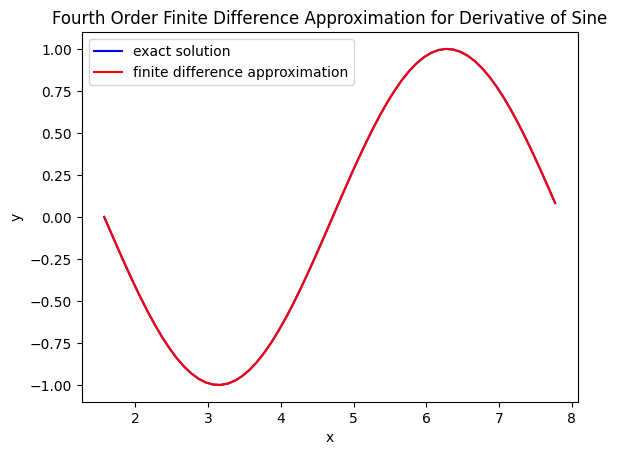

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)
    
def finite_difference(f, x, h):
    return ((f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12.0*h))

h = 0.1
x = np.arange(np.pi/2,5*np.pi/2,h) 

plt.figure(1)
plt.plot(x,f_prime(x),'b-',label = 'exact solution');
plt.plot(x,finite_difference(f,x,h),'r-',label = 'finite difference approximation');
plt.title('Fourth Order Finite Difference Approximation for Derivative of Sine');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Next, we will see an application of the method of finite difference approximation to higher order derivatives.

# *20.3 Approximating of Higher Order Derivatives*

We can directly apply the methods discussed in the previous section, using Taylor Series representations of functions, to higher order derivatives as well. If we take the Taylor expansion of f(x_{j-1}) and f(x_{j+1}), we can derive

In [ ]:
# f''(x_j) = (f(x_{j+1}) - 2f(x_{j}) + f(x_{j-1})) / h^2 + O(h^2)

Using this expression, let's take a look at the second derivative of our previous function, f(x) = sin(x).

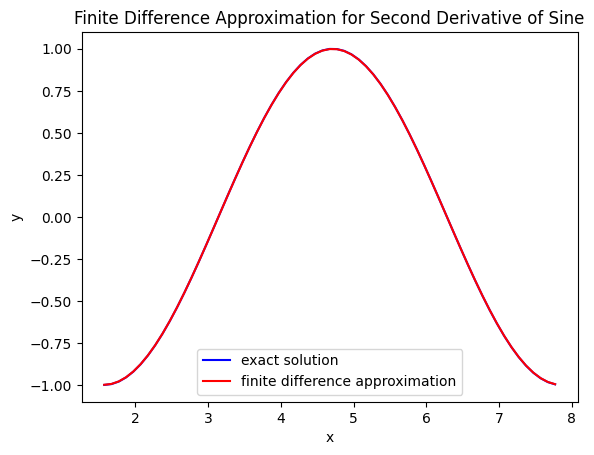

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
    return np.sin(x)

def f_double_prime(x):
    return -np.sin(x)
    
def finite_difference(f, x, h):
    return ((f(x+h) - 2*f(x) + f(x-h)) / (h**2))

h = 0.1
x = np.arange(np.pi/2,5*np.pi/2,h) 

plt.figure(1)
plt.plot(x,f_double_prime(x),'b-',label = 'exact solution');
plt.plot(x,finite_difference(f,x,h),'r-',label = 'finite difference approximation');
plt.title('Finite Difference Approximation for Second Derivative of Sine');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Let's now consider situations in which these methods encounter further issues with accuracy.

# *20.4 Numerical Differentiation with Noise*

Oftentimes, when dealing with data, we do not have a simple function that determines the values we are examining. Especially with wave functions, we might encounter situations when there is a small amount of 'noise' associated with the function generating our data. For example, perhaps we are considering a sine function with a small cosine wave offset: f_noise(x) = sin(x) + epsilon$*$cos(omega$*$x). For small epsilon and large omega values, this function is not that different from f(x) = sin(x):

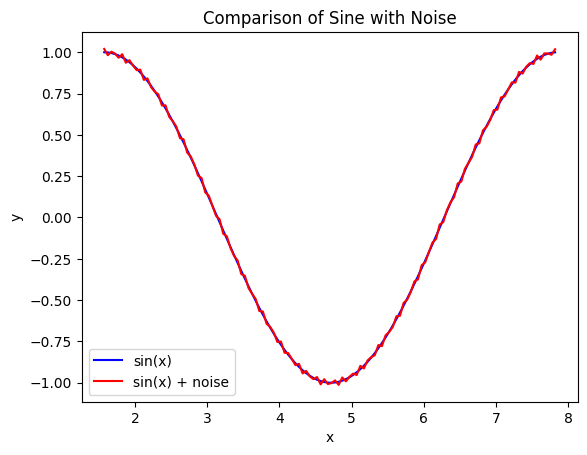

In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
    return np.sin(x)

def f_noise(x,epsilon,omega):
    return np.sin(x) + epsilon * np.cos(omega * x)

h = 0.05
epsilon = 0.02
omega = 200
x = np.arange(np.pi/2,5*np.pi/2,h) 

plt.figure(1)
plt.plot(x,f(x),'b-',label = 'sin(x)');
plt.plot(x,f_noise(x,epsilon,omega),'r-',label = 'sin(x) + noise');
plt.title('Comparison of Sine with Noise');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

When we try to take our finite difference approximation of the derivative, however, we end up with a result that is far more different from our expected derivative:

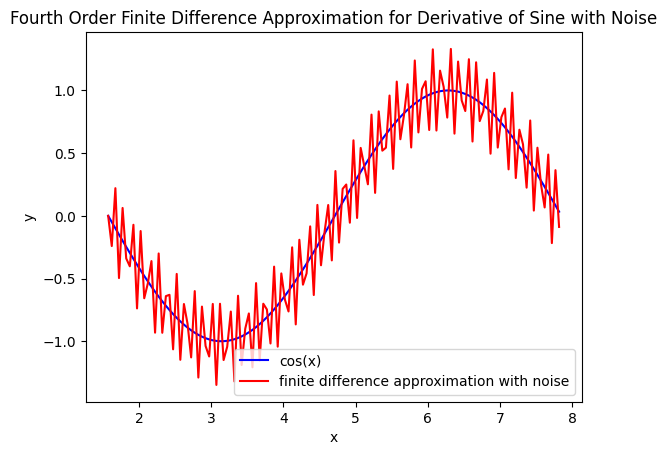

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f_noise(x,epsilon,omega):
    return np.sin(x) + epsilon * np.cos(omega * x)
    
def f_prime(x):
    return np.cos(x)

def finite_difference_noise(f_noise,x,h,epsilon,omega):
    return ((f_noise(x-2*h,epsilon,omega) - 8*f_noise(x-h,epsilon,omega) + 8*f_noise(x+h,epsilon,omega) - f_noise(x+2*h,epsilon,omega)) / (12.0*h))

h = 0.05
epsilon = 0.02
omega = 200
x = np.arange(np.pi/2,5*np.pi/2,h) 

plt.figure(1)
plt.plot(x,f_prime(x),'b-',label = 'cos(x)');
plt.plot(x,finite_difference_noise(f_noise,x,h,epsilon,omega),'r-',label = 'finite difference approximation with noise');
plt.title('Fourth Order Finite Difference Approximation for Derivative of Sine with Noise');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In these situations, our methods are not particularly helpful, or even usable. As such, it is important to consider all potential downsides for using these finite difference approximation methods for the derivative before selecting one to use, or choosing to use a different numerical differentiation method entirely.